In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def print_column(incidents:pd.DataFrame, column:str, num_examples:int=10):
    try:               values = np.unique(np.concatenate(incidents[column].values))
    except ValueError: values = np.unique(incidents[column].values)
    counts = np.array([sum([v in label for label in incidents[column].values]) for v in values])

    idx = np.argsort(counts)[::-1]
    values = values[idx]
    counts = counts[idx]

    num_values = len(counts)
    plt.bar(range(num_values), counts)
    if num_values <= 25: plt.xticks(range(num_values), values, rotation=90)
    else:                plt.xticks([], [], rotation=90)
    
    print(f'Column "{column}" (n = {len(values):d}):\n')
    for v, n in zip(values[:num_examples], counts[:num_examples]):
        print(f'  {v}:{" "*(50-len(v))}{n:5d}')

In [3]:
data = pd.read_csv('incidents_train.csv', index_col=0)
print(len(data))

5082


In [4]:
data

year  month  day country  \
0     1994      1    7      us   
1     1994      3   10      us   
2     1994      3   28      us   
3     1994      4    3      us   
4     1994      7    1      us   
...    ...    ...  ...     ...   
5979  2022      7   28      hk   
5980  2022      7   28      us   
5981  2022      7   29      us   
5982  2022      7   30      us   
5983  2022      7   30      us   

                                                  title  \
0                      Recall Notification: FSIS-024-94   
1                      Recall Notification: FSIS-033-94   
2                      Recall Notification: FSIS-014-94   
3                      Recall Notification: FSIS-009-94   
4                      Recall Notification: FSIS-001-94   
...                                                 ...   
5979    Imported biscuit may contain allergen (peanuts)   
5980  Danny’s Sub and Pizza Recalls Meat Pizza Produ...   
5981  Lyons Magnus Voluntarily Recalls 53 Nutritiona...   
5982  Conagra Brands, Inc., Recalls Frozen Beef Prod...   
5983  Rachael’s Food Corporation Recalls Ready-To-Ea...   

                                                   text hazard-category  \
0     Case Number: 024-94   \n            Date Opene...      biological   
1     Case Number: 033-94   \n            Date Opene...      biological   
2     Case Number: 014-94   \n            Date Opene...      biological   
3     Case Number: 009-94   \n            Date Opene...  foreign bodies   
4     Case Number: 001-94   \n            Date Opene...  foreign bodies   
...                                                 ...             ...   
5979  Imported biscuit may contain allergen (peanuts...       allergens   
5980  023-2022\n\n  \n  High - Class I\n\n    Produc...           fraud   
5981  FRESNO, Calif. – July 28, 2022 – Lyons Magnus ...      biological   
5982  025-2022\n\n  \n  High - Class I\n\n    Misbra...       allergens   
5983  024-2022\n\n  \n  High - Class I\n\n    Produc...      biological   

                  product-category                        hazard  \
0     meat, egg and dairy products        listeria monocytogenes   
1     meat, egg and dairy products                  listeria spp   
2     meat, egg and dairy products        listeria monocytogenes   
3     meat, egg and dairy products              plastic fragment   
4     meat, egg and dairy products              plastic fragment   
...                            ...                           ...   
5979   cereals and bakery products  peanuts and products thereof   
5980    prepared dishes and snacks             inspection issues   
5981       non-alcoholic beverages               cronobacter spp   
5982  meat, egg and dairy products     eggs and products thereof   
5983    prepared dishes and snacks        listeria monocytogenes   

                          product  
0                  smoked sausage  
1                         sausage  
2                      ham slices  
3     thermal processed pork meat  
4                  chicken breast  
...                           ...  
5979                     biscuits  
5980                        pizza  
5981      non-alcoholic beverages  
5982         frozen beef products  
5983                        wraps  

[5082 rows x 10 columns]

In [13]:
data["title"][0]

'Recall Notification: FSIS-024-94'

In [14]:
data["text"][0] 

"Case Number: 024-94   \n            Date Opened: 07/01/1994   \n            Date Closed: 09/22/1994 \n    \n            Recall Class:  1   \n            Press Release (Y/N):  Y  \n    \n            Domestic Est. Number:  05893  P   \n              Name:  GERHARD'S NAPA VALLEY SAUSAGE\n    \n            Imported Product (Y/N):  N       \n            Foreign Estab. Number:  N/A\n    \n            City:  NAPA    \n            State:  CA   \n            Country:  USA\n    \n            Product:  SMOKED CHICKEN SAUSAGE\n    \n            Problem:  BACTERIA   \n            Description: LISTERIA\n    \n            Total Pounds Recalled:  2,894   \n            Pounds Recovered:  2,894"

<Axes: >

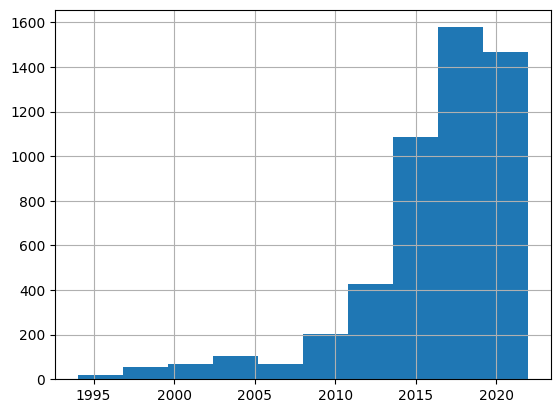

In [3]:
data['year'].hist()

Column "hazard-category" (n = 10):

  allergens:                                          1854
  biological:                                         1741
  foreign bodies:                                      561
  fraud:                                               371
  chemical:                                            287
  other hazard:                                        134
  packaging defect:                                     54
  organoleptic aspects:                                 53
  food additives and flavourings:                       24
  migration:                                             3


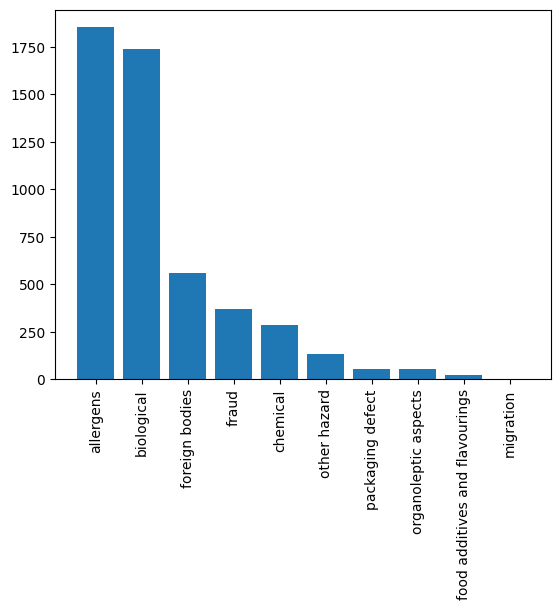

In [4]:
print_column(data, 'hazard-category')

Column "hazard" (n = 128):

  listeria monocytogenes:                              665
  salmonella:                                          621
  milk and products thereof:                           588
  nuts:                                                240
  escherichia coli:                                    237
  cereals:                                             214
  peanuts and products thereof:                        211
  eggs and products thereof:                           208
  cereals containing gluten and products thereof:      207
  plastic fragment:                                    206


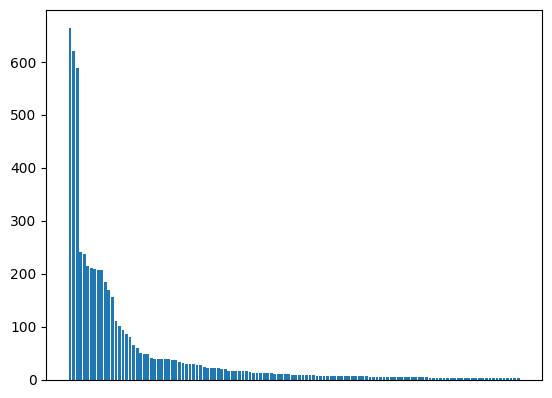

In [5]:
print_column(data, 'hazard')

Column "product-category" (n = 22):

  meat, egg and dairy products:                       1434
  cereals and bakery products:                         671
  fruits and vegetables:                               535
  prepared dishes and snacks:                          469
  seafood:                                             268
  soups, broths, sauces and condiments:                264
  nuts, nut products and seeds:                        262
  ices and desserts:                                   222
  cocoa and cocoa preparations, coffee and tea:        210
  alcoholic beverages:                                 193


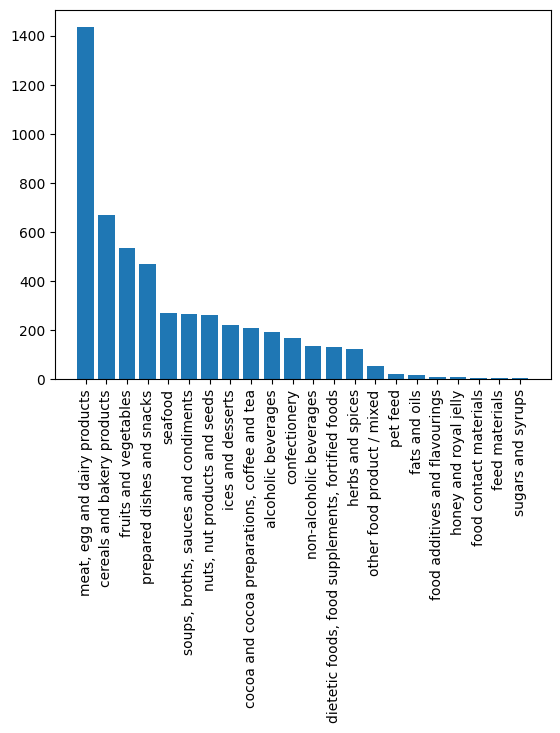

In [6]:
print_column(data, 'product-category')

Column "product" (n = 1022):

  chicken:                                             309
  beef:                                                280
  cheese:                                              231
  chocolate:                                           206
  ice cream:                                           185
  nuts:                                                160
  chicken based products:                              138
  milk:                                                131
  sauce:                                               124
  cakes:                                               116


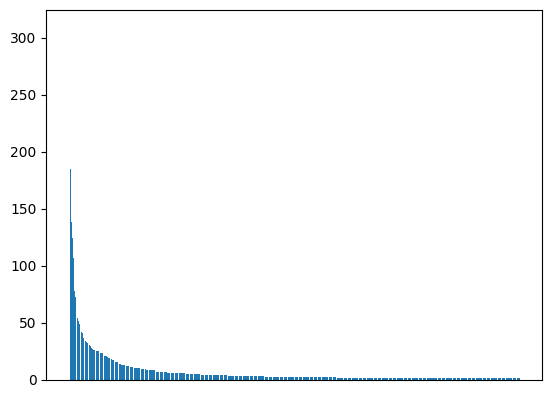

In [7]:
print_column(data, 'product')

Column "country" (n = 9):

  us:                                                 2195
  au:                                                  921
  ca:                                                  856
  uk:                                                  687
  ie:                                                  269
  hk:                                                   92
  na:                                                   54
  sg:                                                    6
  scot:                                                  2


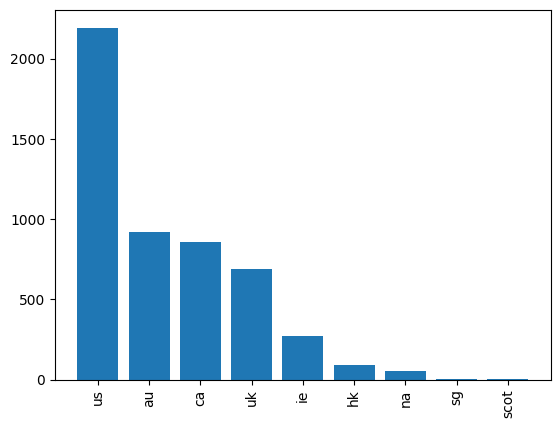

In [8]:
print_column(data, 'country')